In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn import preprocessing
%matplotlib inline

In [32]:
data = pd.read_csv("clean.csv")
y_data  = pd.read_csv("classification.csv")
y_vals = y_data["Total"]

data.head()

,Unnamed: 0,commonFileTypes,creatorName,creatorUserId,currentDatasetVersionId,currentDatasetVersionNumber,datasetId,datasetSize,dateUpdated,diffType,...,scriptCount,title,topicCount,type,viewCount,voteButton,competitionCount,description,full,category
0,0,'csv',Paul Mooney,1314380,161079,5,70947,4043536.0,11/3/2018,unversioned,...,190,2018 Kaggle ML & DS Survey Challenge,12,fileset,274306,678,0,None,'analysis > survey analysis','survey analysis'
1,1,'other',Jason King,459483,194523,1,83790,968989653.0,11/28/2018,versioned,...,11,English Wikipedia Articles 2017-08-20 Models,0,fileset,176,2,0,None,'analysis > text mining','text mining'
2,2,'csv',Mehdi Dagdoug,1227281,59109,1,38809,5621145.0,7/25/2018,versioned,...,40,Black Friday,4,fileset,80770,298,1,'Businesses are organizational entities that ...,'society and social sciences > society > busi...,'business'
3,3,'other',Chris Crawford,484516,150301,18,45286,45177047.0,10/29/2018,unversioned,...,54,Data Science for Good: Center for Policing Equity,27,fileset,52192,282,0,'Datasets and kernels under the government ag...,'general reference > research tools and topic...,'government agencies'
4,4,'other',Danil,1914606,36285,2,28335,609430422.0,5/25/2018,versioned,...,5,Art Images: Drawing/Painting/Sculptures/Engrav...,0,fileset,4086,42,0,"""Activities that holds the attention and inte...",'culture and arts > arts and entertainment','arts and entertainment'


In [33]:
ratio = []
for i in range(0, len(data.viewCount)):
    if data.viewCount[i] == 0:
        ratio.append(0)
    else:
        value = data.downloadCount[i] / data.viewCount[i]
        ratio.append(value)

In [34]:
k = 0
for i in range(0,len(ratio)):
    if ratio[i]>1:
        print(ratio[i])
        ratio[i]=1
        k = k+1

1.6143966125617502
1.149501661129568
2.4151624548736463
20.36697247706422
2.4842767295597485
1.1499118165784832
2.720257234726688
1.1894736842105262
5.814024390243903
1.2239185750636132
2.6877394636015324
1.35181236673774
1.0074441687344913
1.6235294117647059
1.1428571428571428
6.7727272727272725
2.219373219373219
3.0957683741648108
1.160883280757098
1.673913043478261
2.8074792243767313


In [35]:
#intialize the data we will be using
df1= pd.DataFrame({
    'Total Score':y_vals,
    'Ratio': ratio,
})

In [36]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [37]:
labels = kmeans.predict(df1)
centroids = kmeans.cluster_centers_

In [38]:
LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'yellow',
                   2 : 'g'
                   }

label_color = [LABEL_COLOR_MAP[l] for l in labels]

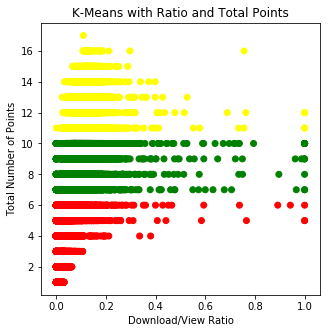

In [39]:
fig = plt.figure(figsize=(5, 5))
    
plt.scatter(df1['Ratio'], df1['Total Score'], color=label_color) #, color=colors, alpha=0.5, edgecolor='k')
# for idx, centroid in enumerate(centroids):
#     plt.scatter(*centroid, color=colmap[idx+1])
plt.xlabel("Download/View Ratio")
plt.ylabel("Total Number of Points")
plt.title("K-Means with Ratio and Total Points")
plt.show()

In [40]:
#intialize the data we will be using
df1= pd.DataFrame({
    'Total Score':y_vals,
    'Votes': data.voteButton,
})

In [41]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df1)
labels = kmeans.predict(df1)
centroids = kmeans.cluster_centers_

In [42]:
LABEL_COLOR_MAP = {0 : 'gray',
                   1 : 'pink',
                   2 : 'blue'
                   }

label_color = [LABEL_COLOR_MAP[l] for l in labels]

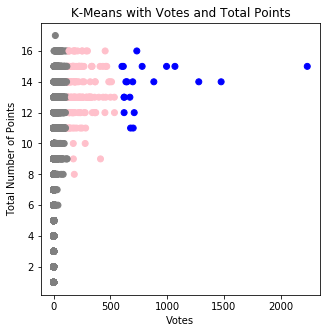

In [43]:
fig = plt.figure(figsize=(5, 5))
    
plt.scatter(df1['Votes'], df1['Total Score'], color=label_color) #, color=colors, alpha=0.5, edgecolor='k')
# for idx, centroid in enumerate(centroids):
#     plt.scatter(*centroid, color=colmap[idx+1])
plt.xlabel("Votes")
plt.ylabel("Total Number of Points")
plt.title("K-Means with Votes and Total Points")
plt.show()

# A new K-Means Example: datasetsize

In [44]:
#intialize the data we will be using
df= pd.DataFrame({
    'Total Score':y_vals,
    'Dataset Size': data.datasetSize,
})

In [45]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [46]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

In [47]:
LABEL_COLOR_MAP = {0 : 'blue',
                   1 : 'fuchsia',
                   2 : 'lime'
                   }

label_color = [LABEL_COLOR_MAP[l] for l in labels]

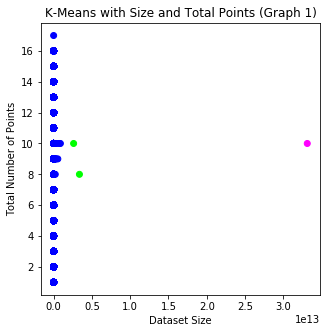

In [48]:
fig = plt.figure(figsize=(5, 5))
    
plt.scatter(df['Dataset Size'], df['Total Score'], color=label_color)
plt.xlabel("Dataset Size")
plt.ylabel("Total Number of Points")
plt.title("K-Means with Size and Total Points (Graph 1)")
plt.show()

In [49]:
df.nlargest(3, 'Dataset Size')

,Total Score,Dataset Size
75,10,3.314020e+13
102,8,3.371480e+12
35,10,2.610770e+12


In [50]:
df3 = df.drop([75,102,35])

In [51]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df3)
labels = kmeans.predict(df3)
centroids = kmeans.cluster_centers_

In [52]:
LABEL_COLOR_MAP = {0 : 'blue',
                   1 : 'fuchsia',
                   2 : 'lime'
                   }

label_color = [LABEL_COLOR_MAP[l] for l in labels]

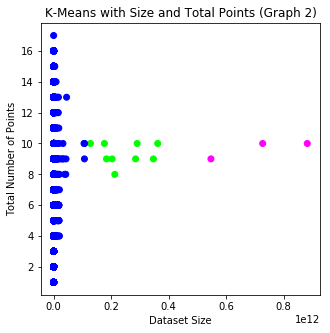

In [53]:
fig = plt.figure(figsize=(5, 5))
    
plt.scatter(df3['Dataset Size'], df3['Total Score'], color=label_color) #, color=colors, alpha=0.5, edgecolor='k')
# for idx, centroid in enumerate(centroids):
#     plt.scatter(*centroid, color=colmap[idx+1])
plt.xlabel("Dataset Size")
plt.ylabel("Total Number of Points")
plt.title("K-Means with Size and Total Points (Graph 2)")
plt.show()

In [54]:
df3.nlargest(3, 'Dataset Size')

,Total Score,Dataset Size
129,10,8.819380e+11
76,10,7.269800e+11
51,9,5.470260e+11


In [55]:
df4 = df.drop([129,76,51])

In [56]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df4)
labels = kmeans.predict(df4)
centroids = kmeans.cluster_centers_

In [57]:
LABEL_COLOR_MAP = {0 : 'blue',
                   1 : 'fuchsia',
                   2 : 'lime'
                   }

label_color = [LABEL_COLOR_MAP[l] for l in labels]

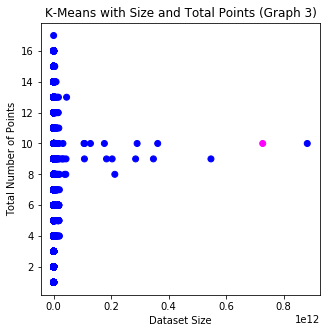

In [58]:
fig = plt.figure(figsize=(5, 5))
    
plt.scatter(df3['Dataset Size'], df3['Total Score'], color=label_color) #, color=colors, alpha=0.5, edgecolor='k')
# for idx, centroid in enumerate(centroids):
#     plt.scatter(*centroid, color=colmap[idx+1])
plt.xlabel("Dataset Size")
plt.ylabel("Total Number of Points")
plt.title("K-Means with Size and Total Points (Graph 3)")
plt.show()

## normalizing dataset size

In [59]:
normalized = []
den = data.datasetSize.max() - data.datasetSize.min()
minimum = data.datasetSize.min()

for i in range(0, len(data)):
    newval = (data.datasetSize[i] - minimum)/den
    normalized.append(newval)

In [60]:
#intialize the data we will be using
df= pd.DataFrame({
    'Total Score':y_vals,
    'Dataset Size': normalized,
})

In [61]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

In [62]:
LABEL_COLOR_MAP = {0 : 'blue',
                   1 : 'fuchsia',
                   2 : 'lime'
                   }

label_color = [LABEL_COLOR_MAP[l] for l in labels]

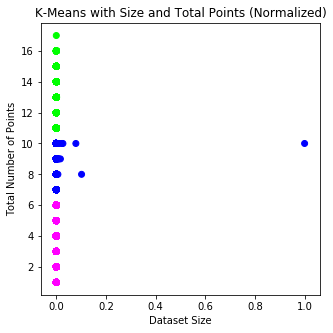

In [63]:
fig = plt.figure(figsize=(5, 5))
    
plt.scatter(df['Dataset Size'], df['Total Score'], color=label_color)
plt.xlabel("Dataset Size")
plt.ylabel("Total Number of Points")
plt.title("K-Means with Size and Total Points (Normalized)")
plt.show()

# Another One!

In [64]:
import math
k=0
cat = []
for i in range(0,len(data.category)): 
    if type(data.category[i]) == float:
        cat.append("None")
    else:
        cat.append(data.category[i])    

In [65]:
cat

["'survey analysis'",
 "'text mining'",
 "'business'",
 "'government agencies'",
 "'arts and entertainment'",
 "'social sciences'",
 "'film'",
 'None',
 "'brazil'",
 "'databases'",
 "'government'",
 "'video games'",
 "'research'",
 "'united states'",
 "'world'",
 "'deep learning'",
 "'beginner'",
 "'politics'",
 "'socrata'",
 "'international relations'",
 "'humor'",
 "'crime'",
 "'databases'",
 "'food and drink'",
 "'neuroscience'",
 "'basketball'",
 "'visual arts'",
 "'politics'",
 "'critical theory'",
 "'ecology'",
 "'climate'",
 'None',
 "'beginner'",
 "'climate'",
 "'asia'",
 "'business'",
 "'finance'",
 "'climate'",
 "'business'",
 "'climate'",
 "'climate'",
 "'climate'",
 "'time series'",
 "'research'",
 "'research'",
 "'climate'",
 "'economics'",
 "'india'",
 "'multiclass classification'",
 "'law'",
 "'business'",
 "'business'",
 "'climate'",
 "'world'",
 "'economics'",
 "'libraries'",
 "'socrata'",
 "'united states'",
 "'healthcare'",
 "'socrata'",
 "'socrata'",
 "'healthcare'"

In [66]:
le = preprocessing.LabelEncoder()

le.fit(cat)
cat = le.transform(cat)


In [67]:
cat

array([294, 301,  38, ...,  93, 328,  93], dtype=int64)

In [68]:
#intialize the data we will be using
df= pd.DataFrame({
    'Total Score':y_vals,
    'Category': cat,
})

In [69]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

In [70]:
LABEL_COLOR_MAP = {0 : 'mediumspringgreen',
                   1 : 'darkmagenta',
                   2 : 'tomato'
                   }

label_color = [LABEL_COLOR_MAP[l] for l in labels]

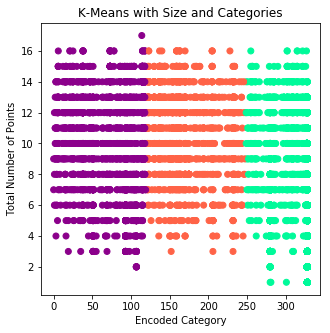

In [71]:
fig = plt.figure(figsize=(5, 5))
    
plt.scatter(df['Category'], df['Total Score'], color=label_color)
plt.xlabel("Encoded Category")
plt.ylabel("Total Number of Points")
plt.title("K-Means with Size and Categories")
plt.show()

In [72]:
#intialize the data we will be using
df= pd.DataFrame({
    'Ratio': ratio,
    'Category': cat,
})

In [73]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

In [74]:
LABEL_COLOR_MAP = {0 : 'grey',
                   1 : 'darkorange',
                   2 : 'chartreuse'
                   }

label_color = [LABEL_COLOR_MAP[l] for l in labels]

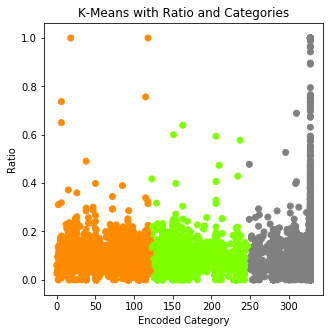

In [75]:
fig = plt.figure(figsize=(5, 5))
    
plt.scatter(df['Category'], df['Ratio'], color=label_color)
plt.xlabel("Encoded Category")
plt.ylabel("Ratio")
plt.title("K-Means with Ratio and Categories")
plt.show()

In [76]:
#intialize the data we will be using
df= pd.DataFrame({
    'Ratio': ratio,
    'Vote Button': data.voteButton,
})

In [77]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

In [78]:
LABEL_COLOR_MAP = {0 : 'darkseagreen',
                   1 : 'chocolate',
                   2 : 'orangered'
                   }

label_color = [LABEL_COLOR_MAP[l] for l in labels]

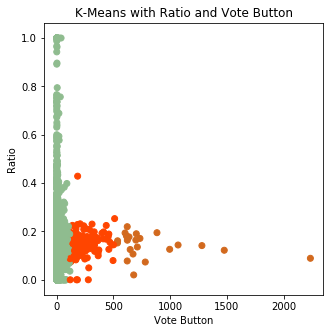

In [79]:
fig = plt.figure(figsize=(5, 5))
    
plt.scatter(df['Vote Button'], df['Ratio'], color=label_color)
plt.xlabel("Vote Button")
plt.ylabel("Ratio")
plt.title("K-Means with Ratio and Vote Button")
plt.show()

## Decision Tree

In [80]:
data.columns

Index(['Unnamed: 0', 'commonFileTypes', 'creatorName', 'creatorUserId',
       'currentDatasetVersionId', 'currentDatasetVersionNumber', 'datasetId',
       'datasetSize', 'dateUpdated', 'diffType', 'downloadCount', 'isFeatured',
       'isSuperFeatured', 'licenseShortName', 'overview', 'ownerName',
       'scriptCount', 'title', 'topicCount', 'type', 'viewCount', 'voteButton',
       'competitionCount', 'description', 'full', 'category'],
      dtype='object')

In [81]:
level = []
for i in range(0, len(y_vals)):
    if 0 <= y_vals[i] <= 6:
        level.append("low")
    elif 7<= y_vals[i] <= 11:
        level.append("medium")
    elif 12<= y_vals[i] <= 18:
        level.append("high")

In [82]:
desc = []
for i in range(0,len(data.description)): 
    if type(data.description[i]) == float:
        desc.append("None")
    else:
        desc.append(data.description[i])    

In [83]:
le = preprocessing.LabelEncoder()

le.fit(data.commonFileTypes)
data.commonFileTypes = le.transform(data.commonFileTypes)

le.fit(data.licenseShortName)
data.licenseShortName= le.transform(data.licenseShortName)

le.fit(desc)
desc = le.transform(desc)

In [85]:
df_for_tree = pd.DataFrame({
    'File_Type': data.commonFileTypes,
    'data_set_size': data.datasetSize,
    'Featured': data.isFeatured, 
    'Super_Featured':data.isSuperFeatured,
    'Competition_Count':data.competitionCount,
    #'Description': desc,
    'Ratio': ratio, 
    'voteButton': data.voteButton, 
    'License': data.licenseShortName,
    #'Category': cat, 
    'Total': level
    
})

In [86]:
df_for_tree.head()
from sklearn import tree 

In [87]:
mytree = tree.DecisionTreeClassifier()
mytree.fit(df_for_tree[['File_Type','data_set_size','Featured','Super_Featured','Competition_Count',
    'Ratio','voteButton','License',]],df_for_tree['Total'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [88]:
labels

array([1, 0, 2, ..., 0, 0, 0])

In [89]:
#CODE FROM CAROLINE JOHNSTON WITH HER PERMISSION TO USE:
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("tree.dot", 'w') as f:
        sklearn.tree.export_graphviz(tree, out_file=f,
                        feature_names=feature_names, filled=True, class_names=["high","low","medium"])

    command = ["dot", "-Tpng", "tree.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")


In [90]:
import graphviz

In [91]:
visualize_tree(mytree, ['File_Type','data_set_size','Featured','Super_Featured','Competition_Count',
    'Ratio','voteButton','License'])

In [92]:
#trying to decifer the labels given in the tree so we can plot it appropriately
med =  0 
low = 0
high = 0
for i in range(0,len(df_for_tree.Total)):
    if df_for_tree.Total[i] == "medium":
        med = med +1
    elif df_for_tree.Total[i] == "high":
        high = high +1
    elif df_for_tree.Total[i] == "low":
        low = low +1
    

In [243]:

print(med)
print(low)
print(high)

5993
5301
1726
